Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder='../clustersearch'
subfolder="2021_12_13_N4univ"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="45948520"
njobs=80
basename="N4univ"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.5),10**(0.5)],[1e-1,1e1],[1e-2,1e2],[1e-3,1e3],[1e-6,1e6]] #copy-paste from the boundary search
absder="True"


In [3]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,14 ok,15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 ok,23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,32 ok,33 ok,34 ok,35 ok,36 ok,37 ok,38 ok,39 ok,40 ok,41 ok,42 ok,43 ok,44 ok,45 ok,46 ok,47 ok,48 ok,49 ok,50 ok,51 ok,52 ok,53 ok,54 ok,55 ok,56 ok,57 ok,58 ok,59 ok,60 ok,61 ok,62 ok,63 ok,64 ok,65 ok,66 ok,67 ok,68 ok,69 ok,70 ok,71 ok,72 ok,73 ok,74 ok,75 ok,76 ok,77 ok,78 ok,79 ok,80 ok,

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]
It seems that the greatest parameter range has errors. Let's doublecheck with mathematica:

In [5]:
checkf=os.path.join(folder1,"tocheck_N4univ")
#tolerance manually modified to 0.0075
print(checkf)
command="wolframscript -file ../bin/N4univ_manualfix_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4univ/tocheck_N4univ
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4univ/tocheck_N4univ
mat_N4univ_0.in
mat_N4univ_0_checked.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,4

 not correct0.972439,0.418925;1.375,0.3;
 not correct0.969611,0.421788;1.38,0.3;
 not correct0.968299,0.427721;1.385,0.3;
 not correct1.05558,0.361936;1.39,0.3;
 not correct1.11387,0.32075;1.395,0.3;
 not correct0.974594,0.426779;1.4,0.3;
 not correct1.10569,0.3475;1.405,0.3;
 not correct1.13319,0.324274;1.41,0.3;
 not correct0.980233,0.45018;1.415,0.3;
 not correct1.12183,0.341097;1.42,0.3;
 not correct1.14188,0.322507;1.425,0.3;
 not correct1.08814,0.354017;1.43,0.3;
 not correct0.967229,0.467426;1.435,0.3;
 not correct0.965134,0.468539;1.44,0.3;
 not correct1.12562,0.345248;1.445,0.3;
 not correct1.04404,0.381848;1.45,0.3;
 not correct1.14098,0.34627;1.455,0.3;
 not correct1.06701,0.398205;1.46,0.3;
 not correct1.16315,0.336788;1.465,0.3;
 not correct1.14284,0.348578;1.47,0.3;
 not correct1.09695,0.367267;1.475,0.3;
 not correct1.17707,0.338015;1.48,0.3;
 not correct1.07194,0.382433;1.485,0.3;
 not correct1.09856,0.372955;1.49,0.3;
 not correct1.18023,0.339672;1.495,0.3;
 not correc

 not correct0.403705,0.464976;0.4,0.465;286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,

 not correct0.882732,0.790743;1.03,0.745;
 not correct0.882844,0.790741;1.035,0.745;460,
 not correct0.869836,0.767222;0.96,0.75;
 not correct0.870351,0.767429;0.965,0.75;
 not correct0.871779,0.772979;0.97,0.75;
 not correct0.8722,0.770671;0.975,0.75;
 not correct0.872945,0.772089;0.98,0.75;
 not correct0.874083,0.777149;0.985,0.75;
 not correct0.875509,0.77896;0.99,0.75;
 not correct0.879156,0.794442;1.025,0.75;469,
 not correct0.939542,0.75535;0.945,0.755;
 not correct0.875181,0.785356;0.995,0.755;
 not correct0.875384,0.785198;1.,0.755;
 not correct0.87615,0.787876;1.005,0.755;
 not correct0.876998,0.790654;1.01,0.755;
 not correct0.876927,0.794761;1.015,0.755;
 not correct0.877456,0.796209;1.02,0.755;477,
 not correct0.938249,0.760135;0.94,0.76;479,
 not correct0.936465,0.767849;0.94,0.765;481,
 not correct0.935831,0.770173;0.94,0.77;483,
 not correct0.933318,0.779093;0.935,0.775;
 not correct0.411726,0.784126;0.4,0.78;
 not correct0.931694,0.783768;0.935,0.78;487,
 not correct0.9

 not correct0.852277,0.305343;0.82,0.3;
 not correct0.866491,0.303939;0.825,0.3;87,88,89,90,91,92,93,
 not correct0.870557,0.301278;0.865,0.3;
 not correct0.866312,0.301013;0.87,0.3;96,97,98,99,100,101,102,103,
 not correct0.920255,0.301802;0.915,0.3;105,
 not correct0.923826,0.301857;0.925,0.3;
 not correct0.925361,0.300908;0.93,0.3;
 not correct0.934959,0.301729;0.935,0.3;
 not correct0.92792,0.304576;0.94,0.3;
 not correct0.918994,0.301387;0.945,0.3;111,112,
 not correct0.925365,0.302659;0.96,0.3;
 not correct0.944457,0.300729;0.965,0.3;
 not correct0.969048,0.302566;0.97,0.3;
 not correct0.966999,0.301745;0.975,0.3;
 not correct0.940242,0.303389;0.98,0.3;118,119,
 not correct0.982974,0.304808;0.995,0.3;
 not correct0.983608,0.304214;1.,0.3;
 not correct0.991981,0.303342;1.005,0.3;123,
 not correct1.0076,0.304083;1.015,0.3;
 not correct0.898575,0.310057;1.02,0.3;
 not correct0.941206,0.307124;1.025,0.3;127,128,
 not correct1.02626,0.300912;1.04,0.3;
 not correct1.00789,0.301583;1.04

 not correct1.03499,0.470157;1.035,0.47;283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,

 not correct1.07011,0.301456;1.08,0.3;
 not correct1.08157,0.302515;1.085,0.3;
 not correct0.960702,0.316622;1.09,0.3;
 not correct0.959212,0.319591;1.095,0.3;
 not correct0.957249,0.321083;1.1,0.3;
 not correct0.955334,0.320929;1.105,0.3;
 not correct0.954028,0.324592;1.11,0.3;
 not correct1.10342,0.301813;1.115,0.3;
 not correct0.949396,0.327882;1.12,0.3;
 not correct1.11566,0.300126;1.125,0.3;
 not correct0.935612,0.320855;1.13,0.3;
 not correct0.932998,0.345008;1.135,0.3;
 not correct0.942546,0.321975;1.14,0.3;
 not correct1.13841,0.301031;1.145,0.3;
 not correct1.13727,0.301857;1.15,0.3;
 not correct0.936038,0.336827;1.155,0.3;
 not correct0.973319,0.325054;1.16,0.3;
 not correct0.930858,0.359706;1.165,0.3;
 not correct0.985705,0.321976;1.17,0.3;
 not correct0.900941,0.363934;1.175,0.3;
 not correct1.16586,0.304736;1.18,0.3;
 not correct1.17869,0.302553;1.185,0.3;
 not correct1.18394,0.302952;1.19,0.3;
 not correct1.15559,0.300661;1.195,0.3;161,162,
 not correct0.940904,0.351302;1

 not correct0.974951,0.425032;0.975,0.425;220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,
 not correct0.401283,0.475005;0.4,0.47;237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,45

 not correct1.08864,0.424255;1.455,0.35;
 not correct1.09185,0.421916;1.46,0.35;277,
 not correct1.063,0.434403;1.445,0.355;
 not correct1.06187,0.437713;1.45,0.355;280,
 not correct1.06549,0.440485;1.435,0.36;
 not correct1.06814,0.438318;1.44,0.36;283,
 not correct1.06163,0.44364;1.425,0.365;
 not correct1.06671,0.440461;1.43,0.365;286,
 not correct1.06491,0.443404;1.415,0.37;
 not correct1.05762,0.447227;1.42,0.37;289,
 not correct1.05425,0.4517;1.4,0.375;
 not correct1.05275,0.451459;1.405,0.375;
 not correct1.05273,0.451388;1.41,0.375;293,
 not correct1.05614,0.452043;1.395,0.38;295,
 not correct1.0584,0.452644;1.385,0.385;
 not correct1.04242,0.461964;1.39,0.385;298,
 not correct1.06079,0.453317;1.375,0.39;
 not correct1.04211,0.46381;1.38,0.39;301,
 not correct1.04794,0.463608;1.365,0.395;
 not correct1.04144,0.466378;1.37,0.395;
 not correct0.399918,0.404231;0.4,0.4;
 not correct1.05018,0.464637;1.355,0.4;
 not correct1.04689,0.465445;1.36,0.4;307,
 not correct1.04685,0.467725;

 not correct1.31992,0.315049;1.32,0.315;205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,
 not correct0.405008,0.349132;0.4,0.345;223,224,225,226,227,228,229,230,231,232,
 not correct1.21498,0.360042;1.215,0.36;234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,42

 not correct0.846521,0.982627;0.78,0.96;
 not correct0.844796,0.977966;0.785,0.96;
 not correct0.842753,0.972736;0.79,0.96;626,627,628,629,
 not correct0.894665,0.972612;0.895,0.97;631,632,633,634,635,636,637,638,639,640,641,
 not correct0.889805,1.00017;0.89,1.;643,644,
 not correct0.840004,1.01067;0.835,1.01;646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,mat_N4univ_3.in
mat_N4univ_3_checked.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166

 not correct1.00231,0.361833;1.4,0.3;
 not correct1.00242,0.363689;1.405,0.3;
 not correct0.996714,0.36552;1.41,0.3;
 not correct1.00545,0.365153;1.415,0.3;
 not correct1.00415,0.364721;1.42,0.3;
 not correct1.0076,0.363801;1.425,0.3;
 not correct1.00427,0.368482;1.43,0.3;
 not correct1.02082,0.366988;1.435,0.3;
 not correct1.02247,0.364674;1.44,0.3;
 not correct1.01287,0.373836;1.445,0.3;
 not correct0.959468,0.466078;1.45,0.3;
 not correct1.01716,0.373158;1.455,0.3;
 not correct1.0186,0.372616;1.46,0.3;
 not correct1.11116,0.356742;1.465,0.3;
 not correct1.05881,0.374908;1.47,0.3;
 not correct1.07704,0.367662;1.475,0.3;
 not correct1.07689,0.369698;1.48,0.3;
 not correct1.07681,0.378075;1.485,0.3;
 not correct1.11568,0.364033;1.49,0.3;
 not correct1.05659,0.392636;1.495,0.3;
 not correct1.08197,0.375581;1.5,0.3;
 not correct1.11135,0.373008;1.505,0.3;
 not correct1.07332,0.386166;1.51,0.3;
 not correct1.04327,0.399033;1.515,0.3;
 not correct1.08886,0.366976;1.52,0.3;
 not correct1.04

 not correct1.1849,0.375072;1.185,0.375;243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,
 not correct1.01999,0.495267;1.02,0.495;299,300,301,
 not correct1.01019,0.504972;1.01,0.505;303,
 not correct1.00499,0.510143;1.005,0.51;305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,
 not correct0.405004,0.669654;0.4,0.665;366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,

 not correct0.935189,0.771697;0.94,0.77;477,
 not correct0.931431,0.778362;0.935,0.775;479,
 not correct0.932836,0.782339;0.935,0.78;481,
 not correct0.93223,0.785124;0.935,0.785;483,
 not correct0.931153,0.790596;0.935,0.79;485,
 not correct0.927158,0.795473;0.93,0.795;487,
 not correct0.927487,0.804358;0.93,0.8;489,
 not correct0.926416,0.809182;0.93,0.805;491,
 not correct0.92653,0.810657;0.93,0.81;493,494,495,
 not correct0.92259,0.821349;0.925,0.82;497,
 not correct0.922503,0.827162;0.925,0.825;499,
 not correct0.922305,0.830054;0.925,0.83;501,
 not correct0.918312,0.838629;0.92,0.835;503,
 not correct0.917642,0.84134;0.92,0.84;505,
 not correct0.918249,0.846869;0.92,0.845;507,
 not correct0.917828,0.850121;0.92,0.85;509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,
 not correct0.913787,0.869311;0.915,0.865;542,543,544,545,546,547,548,549,550,
 not correct0.913759,0.870748;0.915,0.87;552,553,554,555,556

 not correct0.889947,1.00037;0.89,1.;646,647,648,649,650,651,652,653,654,655,656,
 not correct0.884862,1.03183;0.885,1.03;658,659,660,
 not correct0.879911,1.04491;0.88,1.04;662,663,664,665,666,667,668,669,670,671,mat_N4univ_50.in
mat_N4univ_50_checked.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,
 not correct0.670013,0.303429;0.665,0.3;55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,
 not correct1.01008,0.303602;1.005,0.3;123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,
 not correct1.13995,0.315455;1.14,0.315;165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,

 not correct1.10157,0.385329;1.545,0.3;
 not correct1.0746,0.385551;1.55,0.3;
 not correct1.11212,0.384002;1.555,0.3;
 not correct1.13288,0.387267;1.56,0.3;
 not correct1.18599,0.361734;1.565,0.3;
 not correct1.20054,0.359404;1.57,0.3;
 not correct1.12168,0.388509;1.575,0.3;
 not correct1.1171,0.394392;1.58,0.3;
 not correct1.1175,0.394199;1.585,0.3;
 not correct1.11877,0.393222;1.59,0.3;
 not correct1.20777,0.356351;1.595,0.3;241,
 not correct1.10967,0.399434;1.57,0.305;
 not correct1.11225,0.395024;1.575,0.305;
 not correct1.2322,0.350277;1.58,0.305;245,
 not correct1.11128,0.400316;1.555,0.31;
 not correct1.12198,0.394909;1.56,0.31;
 not correct1.22863,0.353134;1.565,0.31;249,
 not correct1.1088,0.403411;1.54,0.315;
 not correct1.10735,0.403154;1.545,0.315;
 not correct1.09579,0.408497;1.55,0.315;253,
 not correct1.09993,0.408533;1.53,0.32;
 not correct1.10814,0.404185;1.535,0.32;
 not correct0.399876,0.327218;0.4,0.325;
 not correct1.09532,0.412667;1.515,0.325;
 not correct1.09863,

 not correct0.399999,0.596746;0.4,0.595;338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,

 not correct0.918257,0.835377;0.92,0.835;504,
 not correct0.919188,0.840067;0.92,0.84;506,
 not correct0.918357,0.845227;0.92,0.845;508,
 not correct0.917888,0.850687;0.92,0.85;510,
 not correct0.914741,0.859689;0.915,0.855;512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,
 not correct0.914697,0.861836;0.915,0.86;529,530,531,532,533,534,535,536,537,538,539,540,541,
 not correct0.914032,0.867768;0.915,0.865;543,544,545,546,547,548,549,550,551,
 not correct0.913436,0.870677;0.915,0.87;553,554,555,556,557,558,559,560,561,562,563,564,565,
 not correct0.909071,0.880831;0.91,0.88;567,568,569,570,571,572,573,574,575,576,
 not correct0.909556,0.890114;0.91,0.89;578,579,580,581,
 not correct0.908937,0.895011;0.91,0.895;583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,
 not correct0.90489,0.915225;0.905,0.915;601,602,
 not correct0.904196,0.920032;0.905,0.92;604,605,606,607,608,609,610,611,612,613,614,
 not correct0.898762,0.939903;0.9,0.935;616,
 not correct0.8

 not correct1.13814,0.323652;1.35,0.3;
 not correct1.34813,0.300808;1.355,0.3;
 not correct1.34639,0.300082;1.36,0.3;
 not correct1.35476,0.301085;1.365,0.3;
 not correct0.971034,0.416648;1.37,0.3;
 not correct0.968467,0.419004;1.375,0.3;
 not correct1.03892,0.373863;1.38,0.3;
 not correct1.04155,0.370528;1.385,0.3;
 not correct0.968085,0.433515;1.39,0.3;
 not correct0.967498,0.431717;1.395,0.3;
 not correct0.968735,0.439174;1.4,0.3;
 not correct1.06534,0.356192;1.405,0.3;
 not correct0.957799,0.443264;1.41,0.3;
 not correct1.14624,0.326086;1.415,0.3;
 not correct1.08645,0.352684;1.42,0.3;
 not correct0.975472,0.455654;1.425,0.3;
 not correct0.968848,0.461803;1.43,0.3;
 not correct1.09694,0.350385;1.435,0.3;
 not correct0.967181,0.466652;1.44,0.3;
 not correct0.962251,0.470569;1.445,0.3;
 not correct0.981606,0.454512;1.45,0.3;
 not correct1.04032,0.412281;1.455,0.3;
 not correct0.978621,0.464042;1.46,0.3;
 not correct1.09937,0.359869;1.465,0.3;
 not correct1.14779,0.345343;1.47,0.3;
 n

 not correct1.10498,0.425104;1.105,0.425;269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508

 not correct1.11776,0.345103;1.43,0.3;
 not correct0.989452,0.373169;1.435,0.3;
 not correct1.09121,0.357575;1.44,0.3;
 not correct1.08467,0.367299;1.445,0.3;
 not correct1.02082,0.371355;1.45,0.3;
 not correct1.08176,0.369323;1.455,0.3;
 not correct1.05037,0.384068;1.46,0.3;
 not correct1.02047,0.373846;1.465,0.3;
 not correct1.01861,0.373697;1.47,0.3;
 not correct1.10618,0.33836;1.475,0.3;
 not correct1.11238,0.363198;1.48,0.3;
 not correct1.10317,0.36155;1.485,0.3;
 not correct1.09623,0.374258;1.49,0.3;
 not correct1.09687,0.379091;1.495,0.3;
 not correct1.15211,0.35363;1.5,0.3;
 not correct0.994319,0.457636;1.505,0.3;
 not correct1.04935,0.377015;1.51,0.3;
 not correct1.0599,0.404702;1.515,0.3;
 not correct1.11158,0.35255;1.52,0.3;
 not correct1.11362,0.369147;1.525,0.3;
 not correct1.08096,0.367987;1.53,0.3;
 not correct1.1066,0.36784;1.535,0.3;
 not correct1.11875,0.368841;1.54,0.3;
 not correct1.11865,0.366743;1.545,0.3;
 not correct1.11836,0.366469;1.55,0.3;
 not correct1.15945

 not correct0.399996,0.568629;0.4,0.565;321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,

 not correct0.937481,0.686428;1.19,0.6;398,
 not correct0.934898,0.687582;1.18,0.605;400,
 not correct0.933628,0.692222;1.175,0.61;402,
 not correct0.932017,0.695371;1.17,0.615;404,
 not correct0.932009,0.700756;1.165,0.62;406,
 not correct0.931053,0.702102;1.16,0.625;408,
 not correct0.929586,0.707021;1.155,0.63;410,
 not correct0.92841,0.709606;1.15,0.635;412,
 not correct0.926921,0.712684;1.145,0.64;414,
 not correct0.925392,0.716196;1.14,0.645;416,
 not correct0.92364,0.719979;1.135,0.65;418,
 not correct0.922197,0.725025;1.13,0.655;420,
 not correct0.920971,0.727367;1.125,0.66;422,
 not correct0.9194,0.730798;1.12,0.665;424,
 not correct0.917972,0.734997;1.115,0.67;426,
 not correct0.916137,0.740495;1.11,0.675;428,
 not correct0.914733,0.742938;1.105,0.68;430,
 not correct0.912732,0.74973;1.1,0.685;432,
 not correct0.911471,0.751861;1.095,0.69;434,
 not correct0.90595,0.755451;1.09,0.695;436,
 not correct0.905438,0.759354;1.085,0.7;438,
 not correct0.898577,0.760352;1.075,0.705;
 

 not correct0.946679,0.300177;0.955,0.3;113,
 not correct0.936352,0.30356;0.965,0.3;
 not correct0.915525,0.302981;0.97,0.3;
 not correct0.937071,0.304262;0.975,0.3;117,
 not correct0.977338,0.303755;0.985,0.3;
 not correct0.977894,0.300866;0.99,0.3;
 not correct0.988178,0.304164;0.995,0.3;
 not correct0.980731,0.304802;1.,0.3;122,
 not correct0.997204,0.301257;1.01,0.3;
 not correct1.01349,0.301641;1.015,0.3;
 not correct1.0135,0.300653;1.02,0.3;126,
 not correct0.890145,0.314116;1.03,0.3;
 not correct1.01541,0.300292;1.035,0.3;
 not correct1.02659,0.303253;1.04,0.3;130,
 not correct0.915936,0.30967;1.05,0.3;
 not correct1.03599,0.304097;1.055,0.3;
 not correct1.04495,0.301657;1.06,0.3;
 not correct0.906738,0.315135;1.065,0.3;
 not correct1.05716,0.304686;1.07,0.3;
 not correct0.930789,0.311977;1.075,0.3;
 not correct0.953674,0.313538;1.08,0.3;
 not correct1.0805,0.301477;1.085,0.3;
 not correct0.951874,0.309924;1.09,0.3;
 not correct0.934557,0.31831;1.095,0.3;
 not correct0.934521,0.

 not correct1.32504,0.301446;1.32,0.3;186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,
 not correct1.32009,0.314991;1.32,0.315;205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,
 not correct1.21497,0.360014;1.215,0.36;234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,
 not correct1.08493,0.440061;1.085,0.44;276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398

 not correct1.06984,0.437609;1.44,0.36;283,
 not correct1.06358,0.441914;1.425,0.365;
 not correct1.06347,0.442732;1.43,0.365;286,
 not correct1.06765,0.443616;1.41,0.37;
 not correct1.06013,0.446558;1.415,0.37;
 not correct1.05941,0.446343;1.42,0.37;290,
 not correct1.06996,0.444271;1.4,0.375;
 not correct1.06205,0.446825;1.405,0.375;293,
 not correct1.0731,0.445149;1.39,0.38;
 not correct1.07166,0.444745;1.395,0.38;296,
 not correct1.06828,0.446738;1.38,0.385;
 not correct1.06736,0.448233;1.385,0.385;299,
 not correct1.0703,0.449127;1.375,0.39;301,
 not correct1.04415,0.466023;1.365,0.395;
 not correct1.04335,0.466346;1.37,0.395;304,
 not correct1.05391,0.461274;1.355,0.4;
 not correct1.04548,0.467458;1.36,0.4;307,
 not correct1.05769,0.461068;1.345,0.405;
 not correct1.04768,0.46849;1.35,0.405;310,
 not correct1.05152,0.466426;1.335,0.41;
 not correct1.0441,0.472691;1.34,0.41;313,
 not correct1.03999,0.477221;1.33,0.415;315,
 not correct0.925818,0.581025;1.33,0.42;317,
 not correct0

In [4]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4univ/tocheck_N4univ"


limits of parameters:,0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;0.316228 3.16228;

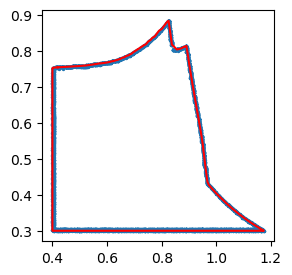

limits of parameters:,0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;0.1 10.0;

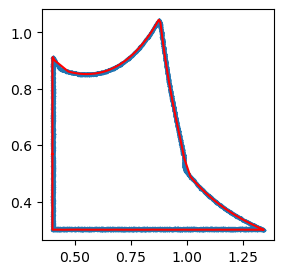

limits of parameters:,0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;0.01 100.0;

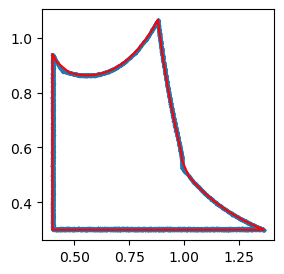

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

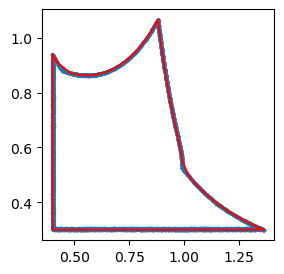

limits of parameters:,1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 184415.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;1e-06 1000000.0;

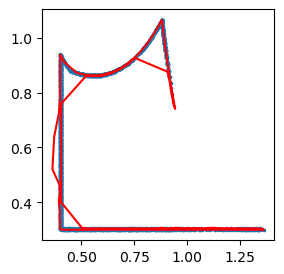

In [5]:
#check that the new "coincident" points give the same boundary as the old ones
#plot points in *checked alongside old boundary
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
             
              
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(5):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos,s=2)
    boundary=np.load("ashapes/ashape_N4univ_%g_2022_8_23.npy"%np.log10(extremespars[plim][1]))
    ax.plot(boundary[0],boundary[1],color="r")
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]

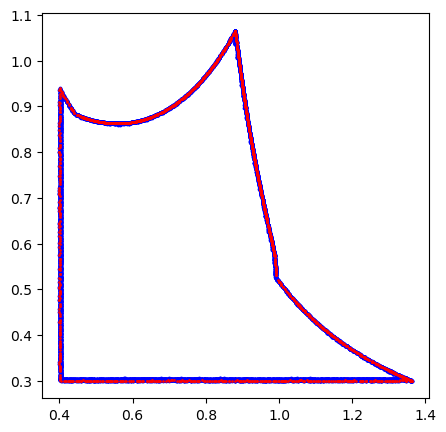

In [14]:
#try to make a new boundary for the 10^-3 to 10^3 parameter set
x,y=checked_pos_stp[3]
l_p=[(x[j],y[j]) for j in range(len(x))] 
alpha=70

plt.figure(figsize=(5,5))
plt.scatter(x,y,color="b",s=3)

a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
plt.scatter(a.exterior.xy[0],a.exterior.xy[1],color="r",s=1)
ashapename=os.path.join("./ashapes/","ashape_N4univcenter_3_2023_5_11.npy")
np.save(ashapename, a.exterior.xy)

plt.show()

In [9]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

looking at limits 0, [0.31622776601683794, 3.1622776601683795]
mat_N4univ_55_allcomparisons.out
next bin position 1.025,0.3 1.03003,0.302088 0.00502755,0.00208827
previous bin position 0.975,0.425 0.974947,0.425036 -0.0000526404,0.0000358894
previous bin steepness 0.4,0.53 0.40156,0.529998 0.00155959,-0.00000155608
0.4 : 1
0.9 : 1
1.0 : 1
mat_N4univ_45_allcomparisons.out
previous bin position 0.98,0.3 0.979906,0.30215 -0.0000937228,0.00215043
previous bin position 1.12,0.3 1.11997,0.300627 -0.0000347126,0.000627479
previous bin position 1.165,0.3 1.16499,0.304037 -0.0000107515,0.00403727
next bin steepness 0.4,0.36 0.401671,0.365026 0.00167122,0.00502614
previous bin position 0.975,0.425 0.97495,0.425034 -0.0000500398,0.0000335662
0.4 : 1
0.9 : 2
1.1 : 2
mat_N4univ_75_allcomparisons.out
next bin steepness 1.125,0.3 1.12889,0.305022 0.00389158,0.00502232
previous bin steepness 1.065,0.355 1.06883,0.354976 0.00382539,-0.000023662
previous bin position 0.975,0.425 0.974939,0.425044 -0.000

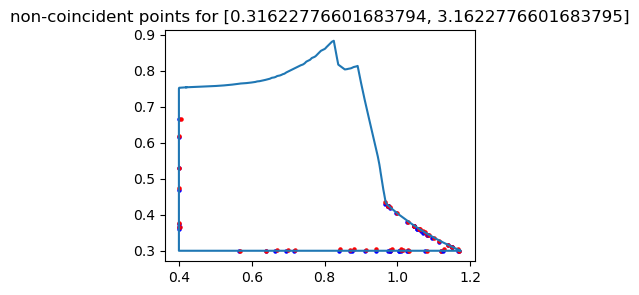

looking at limits 1, [0.1, 10.0]
mat_N4univ_36_allcomparisons.out
previous bin steepness 0.415,0.3 0.415479,0.299993 0.000478917,-0.00000732288
next bin position 1.08,0.3 1.08508,0.300242 0.00507789,0.000242012
next bin position 1.11,0.3 1.11501,0.299994 0.00500851,-0.00000590631
previous bin steepness 1.11,0.3 1.11501,0.299994 0.00500851,-0.00000590631
next bin steepness 1.32,0.3 1.32151,0.305006 0.00151405,0.00500622
previous bin position 1.12,0.405 1.11996,0.405139 -0.0000416181,0.000138784
previous bin position 1.085,0.43 1.08496,0.430036 -0.0000398637,0.0000360474
0.4 : 1
1.0 : 2
1.1 : 2
1.3 : 1
mat_N4univ_26_allcomparisons.out
previous bin position 1.05,0.3 1.04985,0.303909 -0.000149286,0.0039085
next bin position 1.13,0.3 1.135,0.300641 0.00500356,0.000640965
next bin position 1.2,0.3 1.20503,0.302584 0.0050283,0.00258404
next bin position 1.225,0.3 1.23008,0.304809 0.00507896,0.00480915
previous bin position 1.34,0.3 1.33994,0.301059 -0.0000637415,0.00105918
previous bin positi

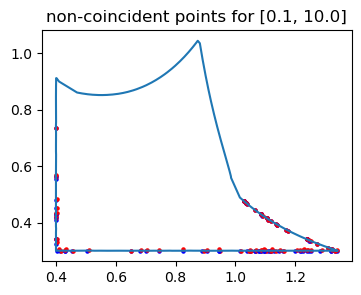

looking at limits 2, [0.01, 100.0]
mat_N4univ_2_allcomparisons.out
next bin position 1.205,0.3 1.21006,0.302243 0.00505998,0.00224261
previous bin position 1.23,0.3 1.2299,0.301333 -0.00010209,0.00133274
previous bin position 1.345,0.305 1.34498,0.305043 -0.0000200217,0.0000433861
previous bin position 1.185,0.375 1.18497,0.375031 -0.0000255231,0.0000311846
previous bin position 1.17,0.38 1.16998,0.383329 -0.0000247471,0.00332893
previous bin position 1.065,0.455 1.06498,0.455083 -0.0000232171,0.0000825137
previous bin position 1.015,0.5 1.01494,0.50023 -0.0000567633,0.000230462
1.0 : 2
1.1 : 2
1.2000000000000002 : 2
1.3 : 1
mat_N4univ_7_allcomparisons.out
next bin position 0.505,0.3 0.510082,0.304004 0.00508205,0.00400406
previous bin position 1.155,0.3 1.15499,0.304861 -0.0000146456,0.00486128
previous bin position 1.25,0.3 1.24992,0.30507 -0.0000792151,0.0050701
next bin steepness 1.25,0.3 1.24992,0.30507 -0.0000792151,0.0050701
previous bin steepness 1.23,0.35 1.2327,0.349974 0.002

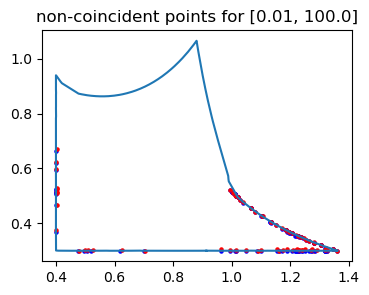

looking at limits 3, [0.001, 1000.0]
mat_N4univ_58_allcomparisons.out
next bin position 0.7,0.3 0.705008,0.304396 0.00500792,0.00439579
previous bin position 1.32,0.315 1.32,0.315021 -0.000000748626,0.0000212709
previous bin steepness 1.225,0.355 1.22524,0.354989 0.000242807,-0.0000108655
previous bin steepness 1.215,0.36 1.21514,0.359993 0.000144723,-0.00000683826
previous bin position 1.205,0.365 1.20491,0.365093 -0.000089551,0.0000933096
0.7000000000000001 : 1
1.2000000000000002 : 3
1.3 : 1
mat_N4univ_48_allcomparisons.out
previous bin position 1.14,0.3 1.13987,0.302542 -0.000133097,0.00254213
next bin position 1.16,0.3 1.16523,0.303537 0.00522525,0.00353679
previous bin steepness 1.225,0.3 1.22734,0.299961 0.00233566,-0.0000388407
next bin position 1.28,0.3 1.285,0.30267 0.00500436,0.00267021
next bin position 1.285,0.3 1.29009,0.304203 0.00508871,0.00420315
next bin steepness 1.345,0.3 1.34756,0.30503 0.00255726,0.00503042
previous bin position 1.325,0.31 1.3249,0.313085 -0.000103

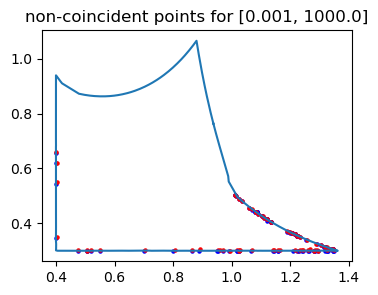

In [7]:
tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
all_outputs=[]
for i in range(4): 
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[] #[j0,n,nc,ni,nwrong,n0,nonanalysed]
    details_wrong=[] #[j0,i0, nbp,pbp,goodp,nbs,pbs,goods]
    fig,ax=plt.subplots(1,1,figsize=(4,3))
    ashape=np.load("ashapes/ashape_N4univ_%g_2022_8_23.npy"%np.log10(extremespars[i][1]))

    ax.plot(ashape[0],ashape[1])
    ax.set_title("non-coincident points for %s"%(str(extremespars[i])))
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]:
            print(f)
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong,ax=ax) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)
    plt.show()

looking at limits 0, [0.31622776601683794, 3.1622776601683795]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[3 5 3 3 1 6 4 2 6 7 4 5 3 3 6 4]
10 jobs with [1e-08, 1) % of wrong, but next bin points
6 jobs with [1, 2) % of wrong, but next bin points
good statistics:
[466 464 466 466 468 463 465 467 463 462 465 464 466 466 463 465]
[0.99360341 0.98933902 0.99360341 0.99360341 0.9978678  0.98720682
 0.99147122 0.99573561 0.98720682 0.98507463 0.99147122 0.98933902
 0.99360341 0.99360341 0.98720682 0.99147122]
6 jobs with [98, 99) % of coincident (same bin) points
10 jobs with [99, 100) % of coincident (same bin) points


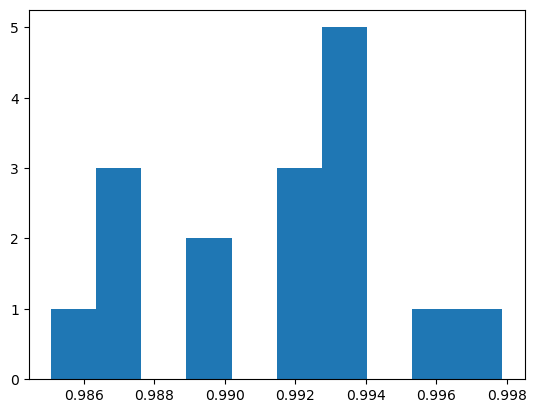

looking at limits 1, [0.1, 10.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[6 8 2 7 3 2 5 9 8 4 9 7 8 4 9 5]
7 jobs with [1e-08, 1) % of wrong, but next bin points
9 jobs with [1, 2) % of wrong, but next bin points
good statistics:
[575 573 579 574 578 579 576 572 573 577 572 574 573 577 572 576]
[0.98967298 0.98623064 0.99655766 0.98795181 0.99483649 0.99655766
 0.99139415 0.98450947 0.98623064 0.99311532 0.98450947 0.98795181
 0.98623064 0.99311532 0.98450947 0.99139415]
9 jobs with [98, 99) % of coincident (same bin) points
7 jobs with [99, 100) % of coincident (same bin) points


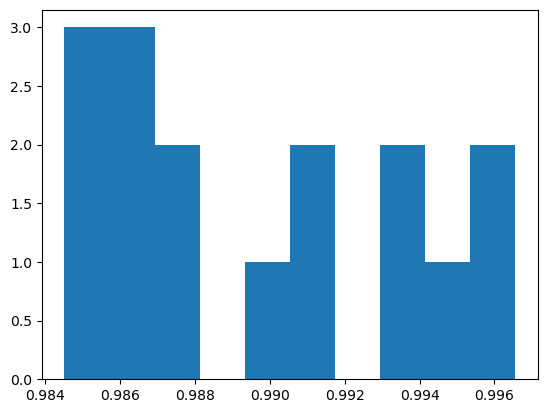

looking at limits 2, [0.01, 100.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[ 7 10  8 15 10  9  4  7  7 10  2  5 10  8  4  7]
4 jobs with [1e-08, 1) % of wrong, but next bin points
11 jobs with [1, 2) % of wrong, but next bin points
1 jobs with [2, 3) % of wrong, but next bin points
good statistics:
[590 587 589 582 587 588 593 590 590 587 595 592 587 589 593 590]
[0.98827471 0.98324958 0.98659966 0.97487437 0.98324958 0.98492462
 0.99329983 0.98827471 0.98827471 0.98324958 0.99664992 0.99162479
 0.98324958 0.98659966 0.99329983 0.98827471]
1 jobs with [97, 98) % of coincident (same bin) points
11 jobs with [98, 99) % of coincident (same bin) points
4 jobs with [99, 100) % of coincident (same bin) points


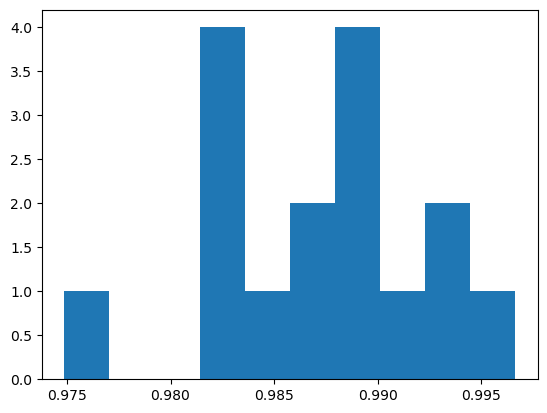

looking at limits 3, [0.001, 1000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[ 5 14  8  4  7  7  8 10  8  8  8  4  9  8  7  6]
3 jobs with [1e-08, 1) % of wrong, but next bin points
12 jobs with [1, 2) % of wrong, but next bin points
1 jobs with [2, 3) % of wrong, but next bin points
good statistics:
[594 585 591 595 592 592 591 589 591 591 591 595 590 591 592 593]
[0.99165275 0.97662771 0.98664441 0.9933222  0.98831386 0.98831386
 0.98664441 0.98330551 0.98664441 0.98664441 0.98664441 0.9933222
 0.98497496 0.98664441 0.98831386 0.98998331]
1 jobs with [97, 98) % of coincident (same bin) points
12 jobs with [98, 99) % of coincident (same bin) points
3 jobs with [99, 100) % of coincident (same bin) points


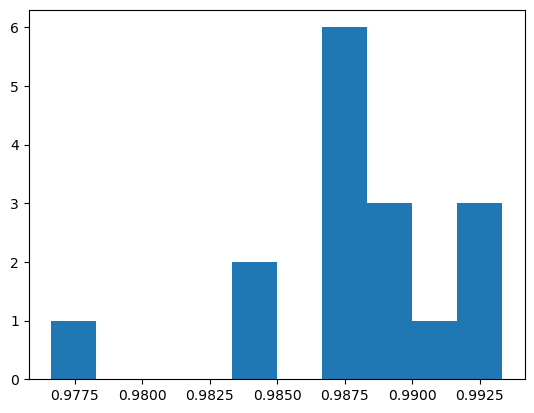

In [7]:
for i in range(len(parlims_nums)-1): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])

Now look at the rest of parameter ranges:

In [8]:
subfolder="2022_01_22_N4univ_otherp"
folder1=os.path.join(datafolder,subfolder)
ashapesfolder="./ashapes"
jid="47623450"
njobs=32
basename="N4univ"

name_ashape="ashape_%s"%basename
extremespars=[[10**(-0.3),10**(0.3)],[10**(-0.7),10**(0.7)]] #copy-paste from the boundary search
absder="True"

In [22]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok",end=",")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 ok,2 ok,3 ok,4 ok,5 ok,6 ok,7 ok,8 ok,9 ok,10 ok,11 ok,12 ok,13 ok,14 ok,15 ok,16 ok,17 ok,18 ok,19 ok,20 ok,21 ok,22 ok,23 ok,24 ok,25 ok,26 ok,27 ok,28 ok,29 ok,30 ok,31 ok,32 ok,

In [23]:
checkf=os.path.join(folder1,"tocheck_N4univ")
#tolerance manually modified to 0.0075
print(checkf)
command="wolframscript -file ../bin/N4univ_manualfix_count.wl '%s' '%s'"%(checkf,absder)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_01_22_N4univ_otherp/tocheck_N4univ
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_01_22_N4univ_otherp/tocheck_N4univ
mat_N4univ_0.in
mat_N4univ_0_checked.out
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37

 not correct1.20498,0.332004;1.205,0.33;198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,
 not correct0.925018,0.304533;0.92,0.3;106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,
 not correct1.04995,0.302959;1.05,0.3;132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,
 not correct1.16995,0.304581;1.17,0.3;156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,
 not correct1.08022,0.404981;1.08,0.405;240,241,2

 not correct0.399938,0.492195;0.4,0.49;276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,5

limits of parameters:,0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;0.501187 1.99526;

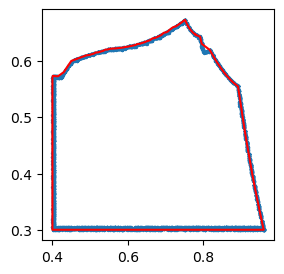

limits of parameters:,0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;0.199526 5.01187;

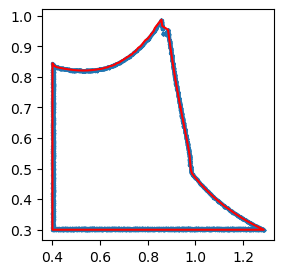

In [9]:
#check that the new "coincident" points give the same boundary as the old ones
#plot points in *checked alongside old boundary
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2022_01_22_N4univ_otherp/tocheck_N4univ"
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
              [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]]
              
             
              
              
for plim in range(2):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos,s=2)
    boundary=np.load("ashapes/ashape_N4univ_%g_2022_8_23.npy"%np.log10(extremespars[plim][1]))
    ax.plot(boundary[0],boundary[1],color="r")
    plt.show()
    

looking at limits 0, [0.5011872336272722, 1.9952623149688795]
mat_N4univ_26_allcomparisons.out
previous bin position 0.955,0.315 0.954969,0.315901 -0.0000307554,0.000900542
previous bin position 0.94,0.36 0.939986,0.363531 -0.0000139147,0.00353136
0.9 : 2
mat_N4univ_16_allcomparisons.out
mat_N4univ_18_allcomparisons.out
mat_N4univ_28_allcomparisons.out
mat_N4univ_2_allcomparisons.out
next bin position 0.41,0.3 0.415054,0.303112 0.00505395,0.00311205
previous bin position 0.955,0.315 0.954989,0.315844 -0.0000113569,0.000843676
0.4 : 1
0.9 : 1
mat_N4univ_4_allcomparisons.out
mat_N4univ_10_allcomparisons.out
mat_N4univ_30_allcomparisons.out
previous bin position 0.96,0.3 0.959992,0.300944 -0.00000787463,0.000943717
previous bin position 0.915,0.455 0.914996,0.455245 -0.00000415437,0.000245326
0.9 : 2
mat_N4univ_20_allcomparisons.out
previous bin position 0.96,0.3 0.959974,0.300832 -0.0000264505,0.000832379
0.9 : 1
mat_N4univ_6_allcomparisons.out
mat_N4univ_8_allcomparisons.out
mat_N4univ_

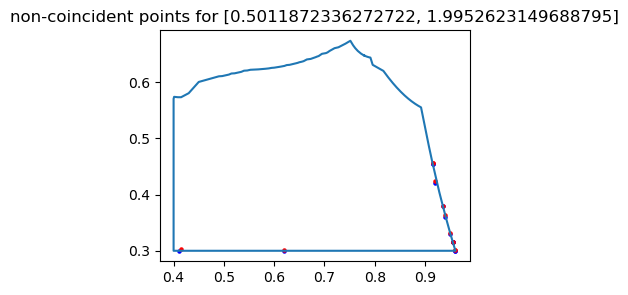

looking at limits 1, [0.19952623149688797, 5.011872336272722]
mat_N4univ_1_allcomparisons.out
previous bin steepness 0.94,0.3 0.940225,0.299986 0.000224924,-0.0000137063
previous bin steepness 1.055,0.3 1.05867,0.299959 0.00366835,-0.0000412171
previous bin position 1.08,0.3 1.07999,0.301522 -0.0000149416,0.00152165
previous bin position 1.195,0.3 1.19497,0.304647 -0.0000290447,0.00464661
previous bin position 1.18,0.345 1.1799,0.345816 -0.0000973244,0.000815955
0.9 : 1
1.0 : 2
1.1 : 2
mat_N4univ_15_allcomparisons.out
previous bin position 0.445,0.3 0.444917,0.3041 -0.0000833391,0.00409969
previous bin position 0.51,0.3 0.509943,0.304045 -0.0000574389,0.00404504
next bin position 0.67,0.3 0.675026,0.30067 0.0050263,0.000669842
previous bin position 1.26,0.31 1.25994,0.310376 -0.0000583736,0.000375859
previous bin position 1.22,0.325 1.2199,0.327146 -0.0000989792,0.00214591
next bin position 1.035,0.435 1.04004,0.435001 0.00503591,0.000000835327
previous bin position 0.4,0.565 0.399963,

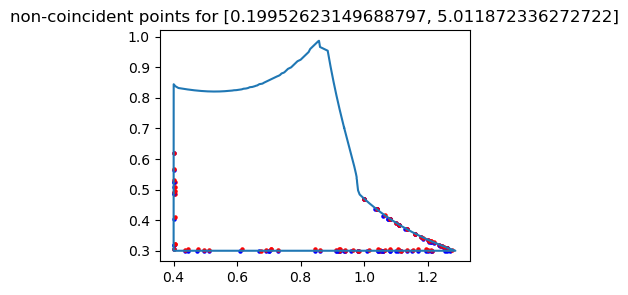

In [10]:

all_outputs=[]
for i in range(2): 
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[] #[j0,n,nc,ni,nwrong,n0,nonanalysed]
    details_wrong=[] #[j0,i0, nbp,pbp,goodp,nbs,pbs,goods]
    fig,ax=plt.subplots(1,1,figsize=(4,3))
    ashape=np.load("ashapes/ashape_N4univ_%g_2022_8_23.npy"%np.log10(extremespars[i][1]))

    ax.plot(ashape[0],ashape[1])
    ax.set_title("non-coincident points for %s"%(str(extremespars[i])))
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]:
            print(f)
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong,ax=ax) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)
    plt.show()

looking at limits 0, [0.5011872336272722, 1.9952623149688795]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[2 0 0 0 2 0 0 2 1 0 0 0 2 0 2 2]
7 jobs with [1e-08, 1) % of wrong, but next bin points
good statistics:
[317 319 319 319 317 319 319 317 318 319 319 319 317 319 317 317]
[0.99373041 1.         1.         1.         0.99373041 1.
 1.         0.99373041 0.9968652  1.         1.         1.
 0.99373041 1.         0.99373041 0.99373041]
7 jobs with [99, 100) % of coincident (same bin) points
9 jobs with [100, 101) % of coincident (same bin) points


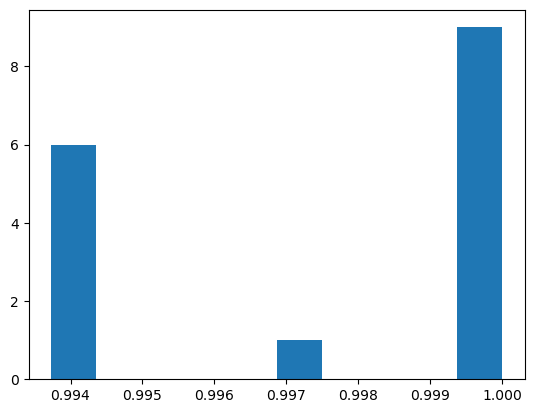

looking at limits 1, [0.19952623149688797, 5.011872336272722]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[ 5  7  4  4 10  5  3 10  6  6  8  5  6  3  7  4]
8 jobs with [1e-08, 1) % of wrong, but next bin points
8 jobs with [1, 2) % of wrong, but next bin points
good statistics:
[535 533 536 536 530 535 537 530 534 534 532 535 534 537 533 536]
[0.99074074 0.98703704 0.99259259 0.99259259 0.98148148 0.99074074
 0.99444444 0.98148148 0.98888889 0.98888889 0.98518519 0.99074074
 0.98888889 0.99444444 0.98703704 0.99259259]
8 jobs with [98, 99) % of coincident (same bin) points
8 jobs with [99, 100) % of coincident (same bin) points


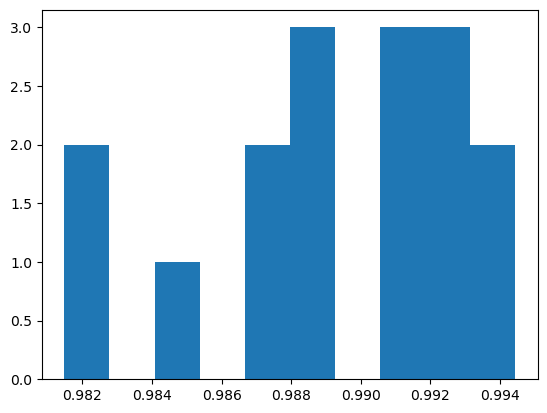

In [12]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])